# Lecture: Understanding KL divergence

**Objective**: Compare how two different new policies diverge from a reference policy using KL Divergence. Understand how differences in action probabilities affect the divergence value.

We know from the lecture that in policy gradient methods the KL divergence is used to measure the change in behaviour when updating from an old policy to a new one. A small divergence means minor changes; a large divergence implies the agent's behaviour may have shifted drastically.

### Excercise 1: Implementing KL divergence with minor stability tricks

Below you see the code for creating a probability distribution of raw unscaled outcomes of a possible policy in RL (the `softmax()` method)

$$ \text{softmax}(x_i) = \frac{e^{x_i}}{\sum_j e^{x_j}} $$

and the code for computing the `kl_divergence()`:

$$ D_{KL}(P||Q) = \sum_x P(x) \log \frac{P(x)}{Q(x)} $$

However, there are some numerical tricks in it so that we have more numerical stability. Find them and comment in the code the corresponding ideas of the extensions! In particular, go to the documentation of the `np.clip()` method and read what exactly the function is doing.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(logits):
    logits = np.array(logits)
    e_x = np.exp(logits - np.max(logits))
    return e_x / e_x.sum()

def kl_divergence(p, q, epsilon=1e-10):
    p = np.clip(p, epsilon, 1)
    q = np.clip(q, epsilon, 1)
    return np.sum(p * np.log(p / q))

### Excercise 2: Try it out!

You now have three different policies, a reference policy and two new policies a and b. We want to measure the difference between these two with respect to the reference distribution.

#### Task 1:
Try it out with the given numbers as well as other numbers in each of the policies. Try to get a feeling on how changing probabilites impact the kl divergence. Use the third cell with the plot function to visualize the changes in the policies.

#### Task 2:
The output is given in nats. What is this and is this reasonable?

In [2]:
# Reference policy (e.g., before update)
ref_policy = np.array([0.6, 0.3, 0.1])  # π_old

# New Policy A: Similar to reference
policy_a = np.array([0.55, 0.35, 0.10])  # small shift

# New Policy B: Significantly different
policy_b = np.array([0.2, 0.4, 0.4])     # large shift

In [3]:
kl_a = kl_divergence(ref_policy, policy_a)
kl_b = kl_divergence(ref_policy, policy_b)

print(f"KL(ref || policy_a) = {kl_a:.4f} nats")
print(f"KL(ref || policy_b) = {kl_b:.4f} nats")

KL(ref || policy_a) = 0.0060 nats
KL(ref || policy_b) = 0.4342 nats


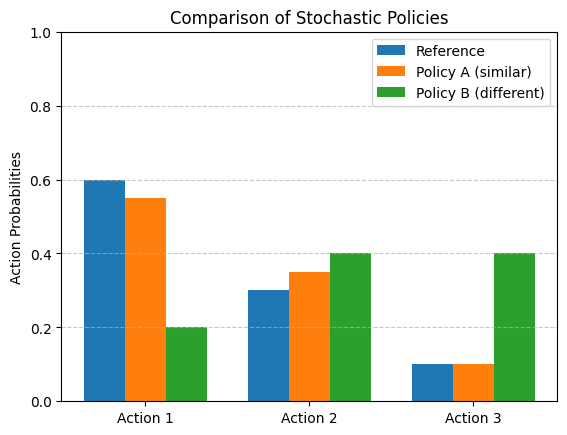

In [4]:
labels = ['Action 1', 'Action 2', 'Action 3']
x = np.arange(len(labels))
width = 0.25

plt.bar(x - width, ref_policy, width, label='Reference')
plt.bar(x, policy_a, width, label='Policy A (similar)')
plt.bar(x + width, policy_b, width, label='Policy B (different)')

plt.ylabel('Action Probabilities')
plt.title('Comparison of Stochastic Policies')
plt.xticks(x, labels)
plt.ylim(0, 1)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

# Lecture: PPO from stable_baselines

Run the following cell only if you are working with google colab to install the `stable_baselines3` package. If you are working locally just ignore this cell if you have already installed it manually or with the `requirements.txt`!

In [ ]:
!pip install stable-baselines3==2.6.0

### Excercise:
Below is the code for applying the stable_baselines3 implementation of PPO on the Cart-Pole environment that we have already solved with REINFORCE in the last lecture.

#### Task 1:
Running the training will output frequently some information about the training process. Look at the values and figure out what the output is about. In particular, find out what

- approx_kl
- clip_fraction
- clip_range
- entropy_loss
- explained_variance
- learning_rate
- loss

means.

In [ ]:
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy

# Create the environment
env = gym.make("CartPole-v1")

# Create a PPO agent with an Mlp Policy
model = PPO("MlpPolicy", env, verbose=1)

# Train the model
model.learn(total_timesteps=100_000)

# Evaluate the model
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10)
print(f"Mean Reward: {mean_reward:.2f} ± {std_reward:.2f}")

# save model
model.save("ppo_cartpole")

#### Task 2:

Test you algorithm with an episode of Cart-Pole.

#### Note: Run this code if you use your local Python setup:

In [7]:
import gymnasium as gym
from stable_baselines3 import PPO

env = gym.make("CartPole-v1", render_mode="human")

# Optional: Modell laden und erneut ausführen
model = PPO.load("ppo_cartpole")

# Beispiel für eine Episode anzeigen
obs, _ = env.reset()
done = False
while not done:
    action, _ = model.predict(obs)
    obs, reward, terminated, truncated, _ = env.step(action)
    done = terminated or truncated
    env.render()

env.close()

#### Note: Run this code if you use colab:

In [ ]:
import gymnasium as gym
from stable_baselines3 import PPO

from IPython.display import HTML
from base64 import b64encode

import imageio

# instantiation of the environment
env = gym.make("CartPole-v1", render_mode="rgb_array")

# resetting the environment for first start
obs, _ = env.reset()

# initialize a list of frames for video creation
frames = []

done = False
while not done:
    # capture the frame and append it to frames list
    frame = env.render()
    frames.append(frame)

    action, _ = model.predict(obs)
    # do one step in the environment
    obs, reward, terminated, truncated, info = env.step(action)

    # flag whether the episode is finished
    done = terminated or truncated

    # final rendering for last image of episode
    if done:
      frame = env.render()
      frames.append(frame)

env.close()

# save video as
video_path = "./CartPole_vid_own_policy.mp4"
imageio.mimsave(video_path, frames, fps=5)

In [ ]:
# this is for displaying the video after saving
mp4 = open(video_path, 'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML(f"""
<video width=400 controls>
    <source src="{data_url}" type="video/mp4">
</video>
""")